# Analisis Exploratorio de Datos

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/raw/books_google_dataset.csv')

In [3]:
df.shape

(6810, 12)

In [4]:
df.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0


In [5]:
df.dtypes

isbn13              int64
isbn10             object
title              object
subtitle           object
authors            object
categories         object
thumbnail          object
description        object
published_year    float64
average_rating    float64
num_pages         float64
ratings_count     float64
dtype: object

In [6]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


## Columna ISBN13

In [7]:
df["isbn13"].value_counts()

isbn13
9789042003408    1
9780002005883    1
9780002261982    1
9780006163831    1
9780006178736    1
                ..
9780006483892    1
9780006483014    1
9780006482079    1
9780006480099    1
9780006479673    1
Name: count, Length: 6810, dtype: int64

In [8]:
df["isbn10"].value_counts()

isbn10
9042003405    1
0002005883    1
0002261987    1
0006163831    1
0006178731    1
             ..
0006483895    1
0006483011    1
0006482074    1
0006480098    1
0006479677    1
Name: count, Length: 6810, dtype: int64

## COLUMNA title

In [9]:
def contar_valores_vacios(df, column):
    numero_filas = df[column].shape[0]
    numero_filas_unicas = df[column].unique().shape[0]
    porcentaje_de_unicos = round(numero_filas_unicas/numero_filas*100, 2)
    numero_filas_vacias = df[column].isna().sum()
    porcentaje_de_vacios = round(numero_filas_vacias/numero_filas*100, 2)
    print("¿Cuántas filas tiene la columna?", numero_filas)
    print("-"*20)
    print("¿Cuántas filas únicas tiene la columna?", numero_filas_unicas)
    print("¿Qué porcentaje de los valores de la columna son únicos?", porcentaje_de_unicos)
    print("-"*20)
    print("¿Cuántas filas vacías tiene la columna?", numero_filas_vacias)
    print("¿Qué porcentaje de los valores de la columna son vacíos?", porcentaje_de_vacios)

In [10]:
contar_valores_vacios(df, "title")

¿Cuántas filas tiene la columna? 6810
--------------------
¿Cuántas filas únicas tiene la columna? 6398
¿Qué porcentaje de los valores de la columna son únicos? 93.95
--------------------
¿Cuántas filas vacías tiene la columna? 0
¿Qué porcentaje de los valores de la columna son vacíos? 0.0


## Columna subtitle

In [11]:
contar_valores_vacios(df, "subtitle")

¿Cuántas filas tiene la columna? 6810
--------------------
¿Cuántas filas únicas tiene la columna? 2010
¿Qué porcentaje de los valores de la columna son únicos? 29.52
--------------------
¿Cuántas filas vacías tiene la columna? 4429
¿Qué porcentaje de los valores de la columna son vacíos? 65.04


In [12]:
# Revisemos los subtitulos asociados a un mismo titulo
df[df["title"] == "The Lord of the Rings"]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
58,9780007124015,0007124015,The Lord of the Rings,NaN,J. R. R. Tolkien,"Baggins, Frodo (Fictitious character)",NaN,Sauron has gathered the Rings of Power - the m...,2001.0,4.49,1546.0,187.0
63,9780007135653,0007135653,The Lord of the Rings,The Art of The Return of the King,Gary Russell,Characters and characteristics in motion pictures,http://books.google.com/books/content?id=oEZ6A...,With complete access to artwork created over a...,2004.0,4.54,224.0,28.0
64,9780007136582,0007136587,The Lord of the Rings,NaN,John Ronald Reuel Tolkien,"Fantasy fiction, English",http://books.google.com/books/content?id=LwO-v...,"Since it was first published in 1954, 'The Lor...",2002.0,4.49,1200.0,680.0
1349,9780261102309,0261102303,The Lord of the Rings,NaN,J. R. R. Tolkien,Fiction,http://books.google.com/books/content?id=9wu1Q...,This single volume edition of J.R.R Tolkien's ...,1991.0,4.49,1200.0,550.0
2500,9780395647417,039564741X,The Lord of the Rings,NaN,J. R. R. Tolkien;Alan Lee,Fiction,NaN,The three books that make up The Lord of the R...,1992.0,NaN,NaN,NaN
3731,9780618153978,0618153977,The Lord of the Rings,NaN,J. R. R. Tolkien,Fiction,http://books.google.com/books/content?id=Ye0OA...,"Beginning on December 19, New Line Cinema will...",2001.0,4.49,1223.0,216.0
3739,9780618258024,0618258027,The Lord of the Rings,The Two Towers : Visual Companion,Jude Fisher,Fiction,http://books.google.com/books/content?id=_2qFv...,"Explores the people, places, and ideas found i...",2002.0,4.51,72.0,4501.0
3740,9780618260225,0618260226,The Lord of the Rings,The Making of the Movie Trilogy,Brian Sibley,Performing Arts,http://books.google.com/books/content?id=7bT5g...,Discusses the making of the movie trilogy base...,2002.0,4.46,192.0,7624.0
3742,9780618260584,0618260587,The Lord of the Rings,NaN,John Ronald Reuel Tolkien,Fiction,http://books.google.com/books/content?id=c-izu...,"An epic detailing the Great War of the Ring, a...",2002.0,4.49,1216.0,1606.0
3747,9780618391004,0618391002,The Lord of the Rings,Weapons and Warfare,Chris Smith,Literary Criticism,http://books.google.com/books/content?id=Wu8x5...,"Describes in detail, with over one thousand ph...",2003.0,4.53,218.0,18934.0


Algunos subtitulos distinguen entre distintos libros de la misma saga, los que no tienen subtitulos pueden ser distintas ediciones del mismo libro. 
El nombre del autor se escribe distinto en distintas versiones.
Tener en cuenta que el average_rating y el rating_count son valores que deben ir en conjunto porque solo el av_rating no nos dice mucho.

## Columna authors

In [13]:
contar_valores_vacios(df, "authors")

¿Cuántas filas tiene la columna? 6810
--------------------
¿Cuántas filas únicas tiene la columna? 3781
¿Qué porcentaje de los valores de la columna son únicos? 55.52
--------------------
¿Cuántas filas vacías tiene la columna? 72
¿Qué porcentaje de los valores de la columna son vacíos? 1.06


In [14]:
def find_chars_in_column(df, column_name, chars_to_find):
    """
    Busca caracteres específicos en una columna del DataFrame
    
    Parámetros:
    df: DataFrame de pandas
    column_name: Nombre de la columna donde buscar
    chars_to_find: String o lista de caracteres a buscar
    
    Retorna:
    DataFrame con las filas que contienen los caracteres buscados
    """
    if isinstance(chars_to_find, str):
        return df[df[column_name].str.contains(chars_to_find, na=False)]
    else:
        pattern = '|'.join(chars_to_find)
        return df[df[column_name].str.contains(pattern, na=False)]


In [15]:
find_chars_in_column(df, "authors", "Tolkien").head(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
39,9780007105045,0007105045,Tree and Leaf,The Homecoming of Beorhtnoth : Beorhthelm's Son,John Ronald Reuel Tolkien,Literary Collections,http://books.google.com/books/content?id=aPb_A...,"""The two works 'On fairy-stories' and 'Leaf by...",2001.0,4.09,176.0,2245.0
58,9780007124015,0007124015,The Lord of the Rings,NaN,J. R. R. Tolkien,"Baggins, Frodo (Fictitious character)",NaN,Sauron has gathered the Rings of Power - the m...,2001.0,4.49,1546.0,187.0
64,9780007136582,0007136587,The Lord of the Rings,NaN,John Ronald Reuel Tolkien,"Fantasy fiction, English",http://books.google.com/books/content?id=LwO-v...,"Since it was first published in 1954, 'The Lor...",2002.0,4.49,1200.0,680.0
65,9780007136599,0007136595,The Fellowship of the Ring,NaN,John Ronald Reuel Tolkien;Alan Lee,"Baggins, Frodo (Fictitious character)",http://books.google.com/books/content?id=K7xSP...,Tolkien's classic fantasy about the quest to s...,2002.0,4.35,410.0,56.0
67,9780007149124,0007149123,Tales from the Perilous Realm,NaN,John Ronald Reuel Tolkien,"Fairy tales, English",http://books.google.com/books/content?id=Wla7N...,"Never before published in a single volume, Tol...",2002.0,4.08,178.0,2964.0


## Columna categories

In [16]:
contar_valores_vacios(df,'categories')

¿Cuántas filas tiene la columna? 6810
--------------------
¿Cuántas filas únicas tiene la columna? 568
¿Qué porcentaje de los valores de la columna son únicos? 8.34
--------------------
¿Cuántas filas vacías tiene la columna? 99
¿Qué porcentaje de los valores de la columna son vacíos? 1.45


In [17]:

def plot_distribution(df, column, figsize=(12,6), color='#2ecc71', title_size=14, label_size=12):
    """
    Crea una visualización profesional de la distribución de valores de una columna
    
    Parámetros:
    df: DataFrame de pandas
    column: Nombre de la columna a visualizar
    figsize: Tupla con el tamaño de la figura
    color: Color del histograma
    title_size: Tamaño del título
    label_size: Tamaño de las etiquetas
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Crear la figura
    fig, ax = plt.subplots(figsize=figsize)
    
    # Crear el histograma con KDE
    sns.histplot(data=df, x=column, kde=True, color=color, alpha=0.6)
    
    # Personalizar el título y etiquetas
    plt.title(f'Distribución de {column}', fontsize=title_size, pad=20)
    plt.xlabel(column, fontsize=label_size)
    plt.ylabel('Frecuencia', fontsize=label_size)
    
    # Añadir estadísticas descriptivas
    stats = f'Media: {df[column].mean():.2f}\nMediana: {df[column].median():.2f}\nDesv. Est.: {df[column].std():.2f}'
    plt.text(0.95, 0.95, stats,
             transform=ax.transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Ajustar los márgenes
    plt.tight_layout()
    
    return plt


In [18]:
df['categories'].value_counts()[:15]

categories
Fiction                      2588
Juvenile Fiction              538
Biography & Autobiography     401
History                       264
Literary Criticism            166
Philosophy                    160
Comics & Graphic Novels       159
Religion                      137
Drama                         132
Juvenile Nonfiction           116
Poetry                         79
Science                        71
Literary Collections           71
Business & Economics           67
Social Science                 60
Name: count, dtype: int64

Hay categorias que contienen a otras categorias, pero esta información no está explicita.
hay algunas pocas categorias con mucha ocurrencia y muchas con poca ocurrencia.

## Columna thumbnail

In [19]:
df['thumbnail']

0       http://books.google.com/books/content?id=KQZCP...
1       http://books.google.com/books/content?id=gA5GP...
2       http://books.google.com/books/content?id=OmQaw...
3       http://books.google.com/books/content?id=FKo2T...
4       http://books.google.com/books/content?id=XhQ5X...
                              ...                        
6805    http://books.google.com/books/content?id=Fv_JP...
6806    http://books.google.com/books/content?id=XcrVp...
6807                                                  NaN
6808    http://books.google.com/books/content?id=Vy7Sk...
6809    http://books.google.com/books/content?id=2lVyR...
Name: thumbnail, Length: 6810, dtype: object

Links que no funcionan y para incluir esto seria necesario agregar un modelo de procesamiento de imágenes

## Columna description

In [20]:
contar_valores_vacios(df,'description')

¿Cuántas filas tiene la columna? 6810
--------------------
¿Cuántas filas únicas tiene la columna? 6475
¿Qué porcentaje de los valores de la columna son únicos? 95.08
--------------------
¿Cuántas filas vacías tiene la columna? 262
¿Qué porcentaje de los valores de la columna son vacíos? 3.85


In [21]:
df['description'].value_counts()

description
No Marketing Blurb                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [22]:
df[df['description'] == "This is a reproduction of the original artefact. Generally these books are created from careful scans of the original. This allows us to preserve the book accurately and present it in the way the author intended. Since the original versions are generally quite old, there may occasionally be certain imperfections within these reproductions. We're happy to make these classics available again for future generations to enjoy!"]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
5851,9781406904833,140690483X,Nöddebo Parsonage,A Story of Country Life in Denmark,Bentley,NaN,http://books.google.com/books/content?id=OFJyy...,This is a reproduction of the original artefac...,2019.0,4.32,224.0,8206.0
5853,9781406917895,1406917893,"Israel's Shepherd; Or, Thoughts on the Love of...",NaN,Hardpress,History,http://books.google.com/books/content?id=1q9_y...,This is a reproduction of the original artefac...,2019.0,3.72,46.0,605.0
5854,9781406922905,1406922900,"The Pronouncing Reading Book for Children, Wit...",NaN,William L Robinson,History,http://books.google.com/books/content?id=gyiJy...,This is a reproduction of the original artefac...,2019.0,3.66,92.0,2477.0
5855,9781406934854,1406934852,A Commentary Upon the Gospel According to S. Luke,NaN,Saint Cyril (patriarch of Alexandria),History,http://books.google.com/books/content?id=Mclsy...,This is a reproduction of the original artefac...,2019.0,3.59,362.0,669.0
5856,9781406942354,1406942359,Collections of the Massachusetts Historical So...,NaN,Hardpress,History,http://books.google.com/books/content?id=mB3Jr...,This is a reproduction of the original artefac...,2019.0,4.13,192.0,2.0
5857,9781406957242,1406957240,The Story of the Life of Lafayette,As Told by a Father to His Children,Mrs John Farrar,History,http://books.google.com/books/content?id=oVd-y...,This is a reproduction of the original artefac...,2019.0,3.93,368.0,29.0


Algunas pocas descripciones se repiten, la descripción a veces habla del contenido del libro o de condiciones de la publicación, como ser una reproducción para la conservación

## Columna published year

In [23]:
contar_valores_vacios(df,'published_year')

¿Cuántas filas tiene la columna? 6810
--------------------
¿Cuántas filas únicas tiene la columna? 95
¿Qué porcentaje de los valores de la columna son únicos? 1.4
--------------------
¿Cuántas filas vacías tiene la columna? 6
¿Qué porcentaje de los valores de la columna son vacíos? 0.09


<module 'matplotlib.pyplot' from 'c:\\Users\\luise\\Documents\\Proyectos\\Bibliotecas\\RecomendacionLiterarIA\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

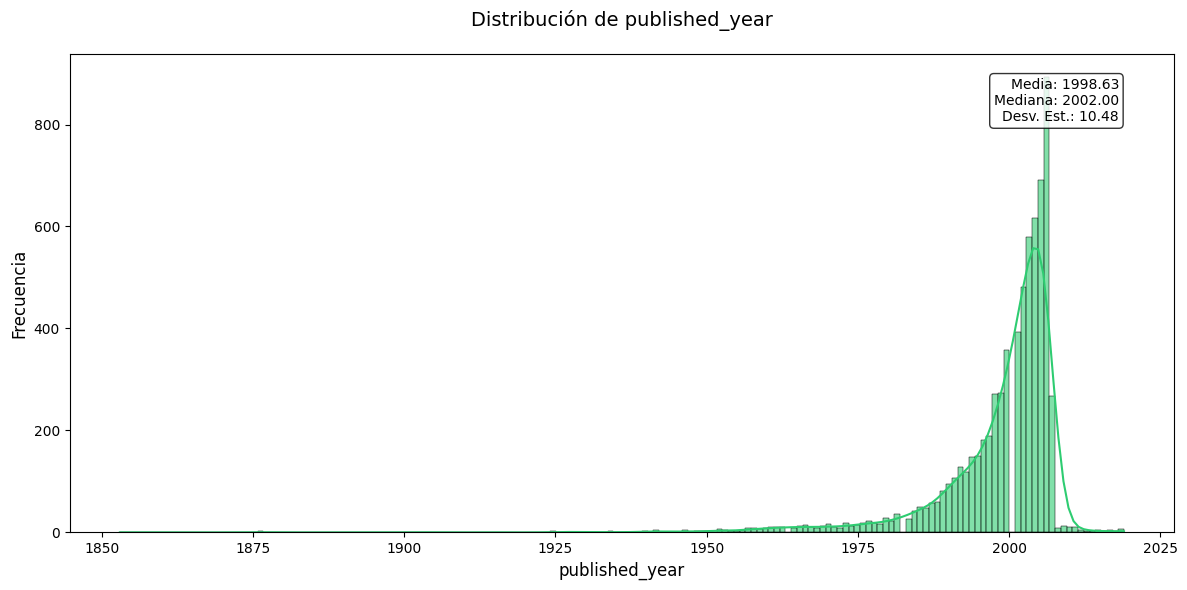

In [24]:
plot_distribution(df,'published_year')

Los años donde hay más libros publicados son los de después del 2000.
Solo 6 titulos les falta el año
Hay pocos libros muy recientes.

## Columna average_rating

In [25]:
contar_valores_vacios(df,'average_rating')

¿Cuántas filas tiene la columna? 6810
--------------------
¿Cuántas filas únicas tiene la columna? 201
¿Qué porcentaje de los valores de la columna son únicos? 2.95
--------------------
¿Cuántas filas vacías tiene la columna? 43
¿Qué porcentaje de los valores de la columna son vacíos? 0.63


<module 'matplotlib.pyplot' from 'c:\\Users\\luise\\Documents\\Proyectos\\Bibliotecas\\RecomendacionLiterarIA\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

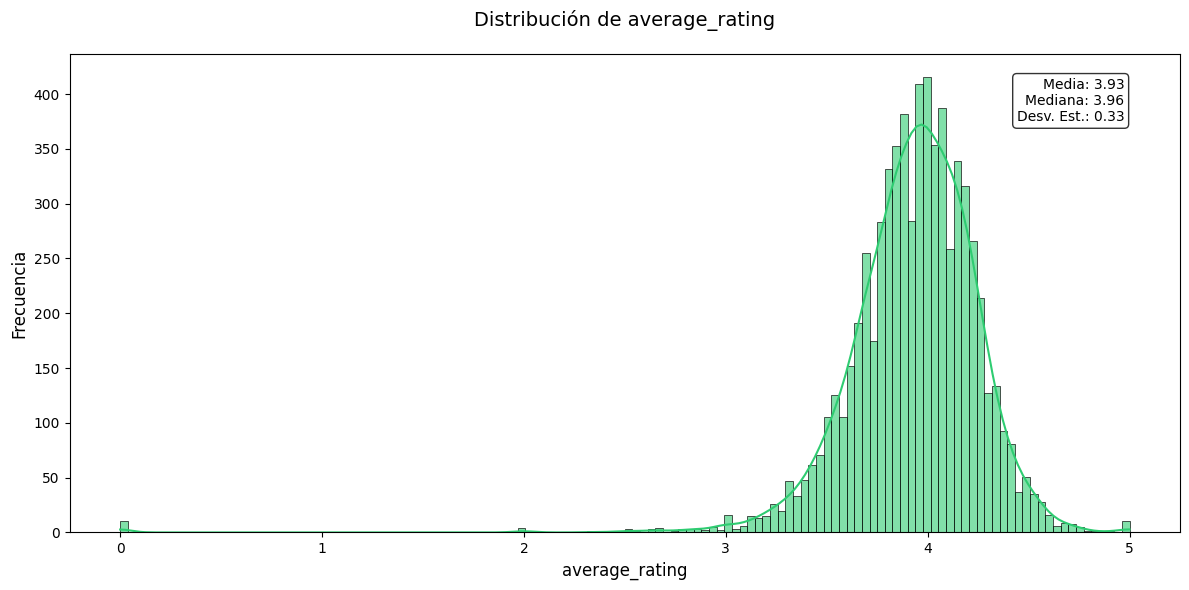

In [26]:
plot_distribution(df,'average_rating')

La distribución está sesgada a la derecha, hay algunos pocos valores atípicos de 0, 2 y 5.
Es necesario comparar con el rating-counts
Hay muchos ratings promedio que se repiten

## Columna num_pages

In [27]:
contar_valores_vacios(df,'num_pages')

¿Cuántas filas tiene la columna? 6810
--------------------
¿Cuántas filas únicas tiene la columna? 916
¿Qué porcentaje de los valores de la columna son únicos? 13.45
--------------------
¿Cuántas filas vacías tiene la columna? 43
¿Qué porcentaje de los valores de la columna son vacíos? 0.63


<module 'matplotlib.pyplot' from 'c:\\Users\\luise\\Documents\\Proyectos\\Bibliotecas\\RecomendacionLiterarIA\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

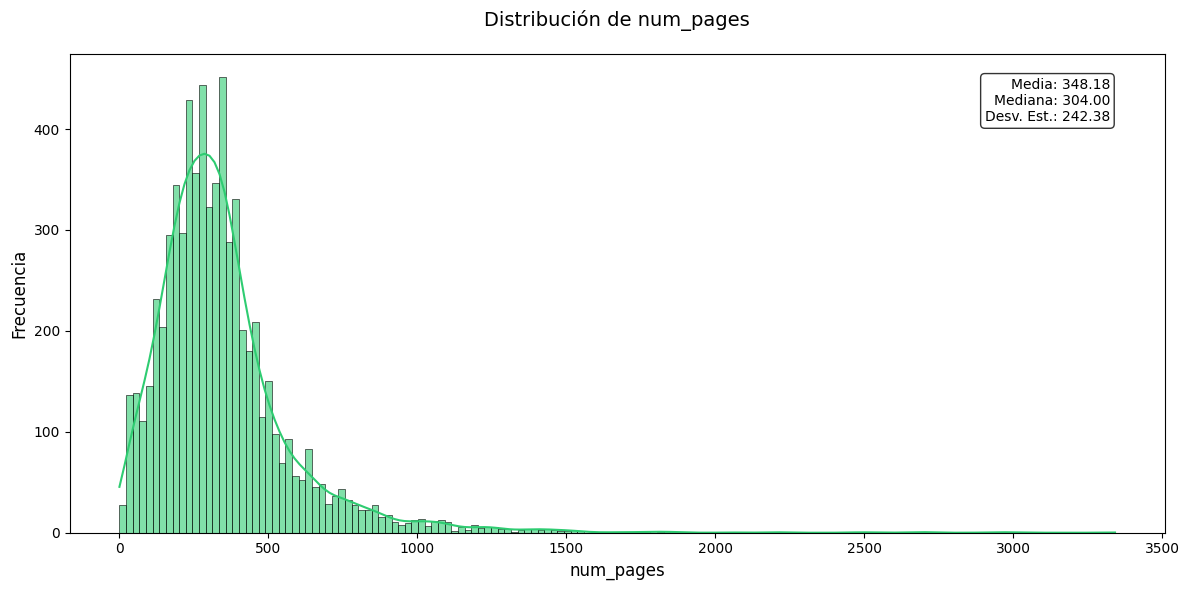

In [28]:
plot_distribution(df,'num_pages')

## Columna ratings_count

¿Cuántas filas tiene la columna? 6810
--------------------
¿Cuántas filas únicas tiene la columna? 3882
¿Qué porcentaje de los valores de la columna son únicos? 57.0
--------------------
¿Cuántas filas vacías tiene la columna? 43
¿Qué porcentaje de los valores de la columna son vacíos? 0.63


<module 'matplotlib.pyplot' from 'c:\\Users\\luise\\Documents\\Proyectos\\Bibliotecas\\RecomendacionLiterarIA\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

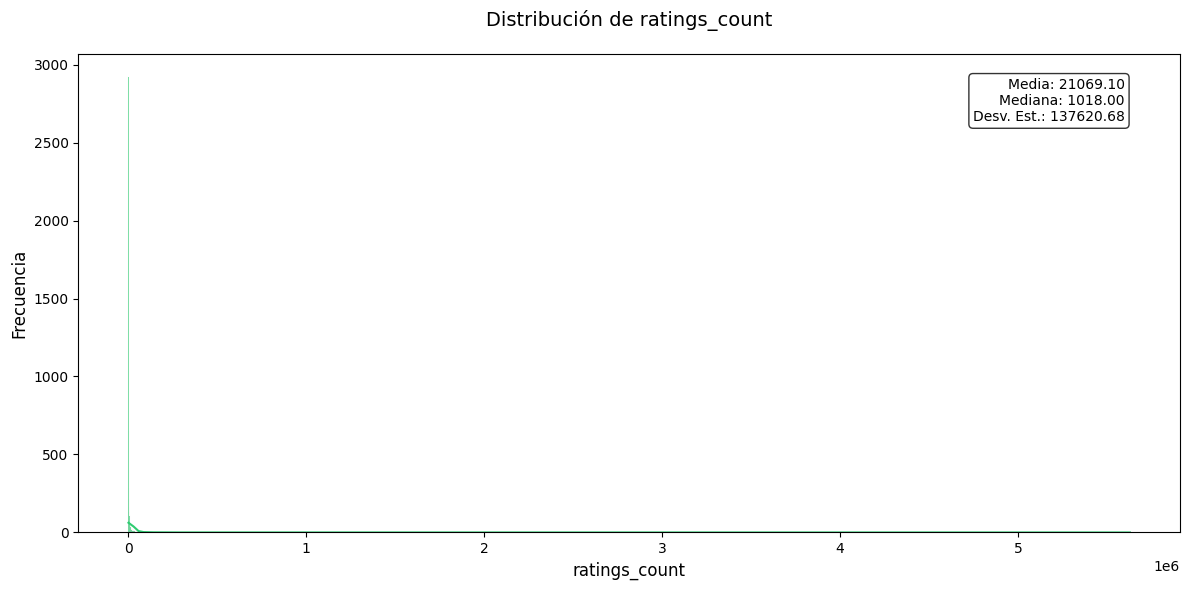

In [29]:
contar_valores_vacios(df,'ratings_count')
plot_distribution(df,'ratings_count')

In [30]:
df["ratings_count"].value_counts()

ratings_count
4.0       39
10.0      33
9.0       29
11.0      29
8.0       29
          ..
486.0      1
403.0      1
837.0      1
1972.0     1
2461.0     1
Name: count, Length: 3881, dtype: int64

C:\Users\luise\AppData\Local\Temp\ipykernel_17040\680092676.py:2: RuntimeWarning: divide by zero encountered in log10
  df["log_ratings_count"] = df["ratings_count"].apply(lambda x: np.log10(x))
c:\Users\luise\Documents\Proyectos\Bibliotecas\RecomendacionLiterarIA\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<module 'matplotlib.pyplot' from 'c:\\Users\\luise\\Documents\\Proyectos\\Bibliotecas\\RecomendacionLiterarIA\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

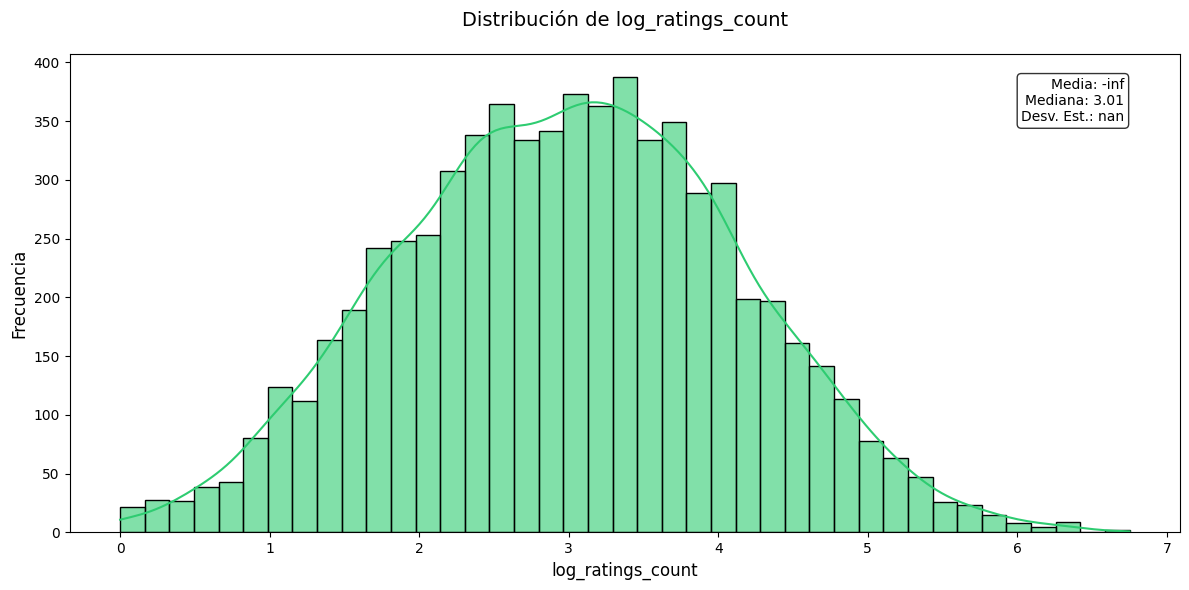

In [31]:
import numpy as np
df["log_ratings_count"] = df["ratings_count"].apply(lambda x: np.log10(x))
plot_distribution(df,'log_ratings_count')

# Descripción de las columnas
- **isbn13**: 
Número de ISBN13
- **isbn10**: 
Número de ISBN10, contiene también caracteres.
- **title**: 
Titulos de los libros, algunos se repiten. No hay Nan ni Nulls.
- **subtitle**: 
Subtitulo del libro, alrededor del 65% de los libros no tienen subtitulo. y hay muchos subtitulos cortos que se repiten como "A Novel", "A Play", etc.
Algunos subtitulos distinguen entre distintos libros de la misma saga, los que no tienen subtitulos pueden ser distintas ediciones del mismo libro. 
- **authors**: Puede tener varios autores separados por ";". El mismo autor puede escribirse de formas distintas.
- **categories**: Hay categorías que contienen a otras de forma no explicita, pocas categorias con mucha ocurrencia y muchas con pocas.
- **thumbnail**:  Imágenes de la portada, links que no funcionan y no es procesable sin modelo de procesamiento de imágenes.
- **description**: Descripción del contenido del libro, algunos libros no tienen descripción, otros hablan sobre que es una obra de reproducción, algunos tienen valores nulos.
- **published_year**: Año de publicación, la mayoria publicados alrededor de 1990-2010, pocos libros muy antiguos y muy nuevos.
- **average_rating**: Rating promedio de las personas, sesgado fuertemence hacia la derecha, pocos valores atípicos de 0,2 y 5. Tiene pocos faltantes.
- **num_pages**: Parece tener una distribución tipo levy con una cola muy larga. Tiene pocos faltantes.
- **ratings_count**: Hay una alta variabilidad en el número de ratings, hay muchos libros con pocos ratings y pocos con muchos. Cuando se hace el log10 de los ratings hay una distribución más uniforme, casi normal.

## Matriz de Correlación

In [32]:
df[["published_year","average_rating","num_pages","ratings_count"]].corr()

,published_year,average_rating,num_pages,ratings_count
published_year,1.000000,-0.064344,-0.002641,0.047258
average_rating,-0.064344,1.000000,0.200153,0.049872
num_pages,-0.002641,0.200153,1.000000,0.035768
ratings_count,0.047258,0.049872,0.035768,1.000000


# Selección de las variables a utilizar

In [33]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'log_ratings_count'],
      dtype='object')

- **isbn13** Como identificador único de cada libro.
- **description** Para usar la descripción podríamos usar otro modelo que clasifique el libro en una categoría de sentimiento.
- **authors** Para usar los autores podríamos usar otro modelo que clasifique el libro en una categoría de género.
- **published_year** Como variable númerica.
- **num_pages** Como variable númerica.